This is the general usage version of the Stirling-Essex Depth and Object Segmentation Model
Simply provide the path to the images you wish to predict with

In [6]:
## Import neccessary libraries
from natsort import natsorted
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import *
from natsort import natsorted
from tensorflow.keras.models import *
import tensorflow.keras.backend as K
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D, Cropping2D, Conv2D
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

The file paths below can either each be a path to single image pair or a folder containging several images, the code will adapt accordingly

In [7]:
# Example image paths -- Replace these with paths of provided images


left_img_string = 'test_folder/l_frames/test/test/' # left image/ image folder
right_img_string = 'test_folder/r_frames/test/test' # right image/ image folder

left_img_mask_string = 'test_folder/left_seg/test/test/' # left ground-truth segemenattaion mask
right_img_mask_string = 'test_folder/right_seg/test/test/' # right ground-truth segmenation mask

# Depth image should be taken from left image
depth_img_string = 'test_folder/l_zbuffs/test/test/' # depth ground-truth

In [8]:
is_noisy = False ## Change this to True if you would like noise to be applied to the images

In [9]:
# This cell determines if one or several images are to be predicted 

is_pic = False
is_dir = False

try:
    print(len(os.listdir(left_img_string)))
    batch_size = len(os.listdir(left_img_string))
    print('file path is directory')
    is_dir = True
except:
    print('file path is image')
    is_pic = True

7
file path is directory


In [10]:
# Read images and convert to Numpy arrays for processing
if is_pic == True:
    left_img = plt.imread(left_img_string)
    right_img = plt.imread(right_img_string)
    left_img = np.asarray(left_img)
    right_img = np.asarray(right_img)
    left_img = cv2.resize(left_img,(224,224))
    right_img = cv2.resize(right_img,(224,224))
    # Adds 'batch' dimension to images so they can be feed into the network
    left_img = tf.expand_dims(left_img,0)
    right_img = tf.expand_dims(right_img,0)
    plt.imshow(left_img[0])
    
    
#Sort images into list ready for storage in correct directory structure    

if is_dir == True:
    left_imgs = []
    right_imgs = []
    depth_imgs = []
    left_masks = []
    right_masks = []
    for i in natsorted(os.listdir(left_img_string)):
        if 'png' in i:
            x = os.path.join(left_img_string,i)
            #x = plt.imread(x)
            #x = cv2.resize(x,(224,224))
            left_imgs.append(x)
    for i in natsorted(os.listdir(right_img_string)):
        if 'png' in i:
            x = os.path.join(right_img_string,i)
            #x = plt.imread(x)
            #x = cv2.resize(x,(224,224))
            right_imgs.append(x)
            
    for i in natsorted(os.listdir(depth_img_string)):
        if 'png' in i:
            x = os.path.join(depth_img_string,i)
           # x = plt.imread(x)
            #x = cv2.resize(x,(224,224))
            depth_imgs.append(x)
            
    for i in natsorted(os.listdir(left_img_mask_string)):
        if 'png' in i:
            x = os.path.join(left_img_mask_string,i)
           # x = plt.imread(x)
            #x = cv2.resize(x,(224,224))
            left_masks.append(x)
            
    for i in natsorted(os.listdir(right_img_mask_string)):
        if 'png' in i:
            x = os.path.join(right_img_mask_string,i)
            #x = plt.imread(x)
            #x = cv2.resize(x,(224,224))
            right_masks.append(x)
        

In [11]:
# Create folder path to store

if is_dir == True:
    try:
        os.makedirs('test_folder/l_frames/test/test')
        os.makedirs('test_folder/r_frames/test/test')
        os.makedirs('test_folder/l_zbuffs/test/test')
        os.makedirs('test_folder/r_zbuffs/test/test')
        os.makedirs('test_folder/left_seg/test/test')
        os.makedirs('test_folder/right_seg/test/test')
    except:
        print('folders already exists')
            

folders already exists


In [12]:
# Saves images into required subdirectory structure

if is_dir == True:
    idx = 0
    for i in range(len(left_imgs)):
        img = Image.open(left_imgs[i])
        img.save('test_folder/l_frames/test/test/test_image' + str(idx) + '.png','PNG')
        idx += 1
        
    idx = 0
    for i in range(len(right_imgs)):
        img = Image.open(right_imgs[i])
        img.save('test_folder/r_frames/test/test/test_image' + str(idx)+ '.png','PNG')
        idx += 1
        
    idx = 0
    for i in range(len(depth_imgs)):
        
        depth_img = cv2.imread(depth_imgs[i],0)
        #plt.imshow(depth_img)#load as 'grayscale' image
        depth_img = np.float32(depth_img)
        depth_img = cv2.resize(depth_img,(224,224))
        
        
        #img = Image.open(depth_imgs[i])
        cv2.imwrite('test_folder/l_zbuffs/test/test/test_depth' + str(idx)+ '.png',depth_img)
        idx += 1
        
    idx = 0
    for i in range(len(left_masks)):
        img = Image.open(left_masks[i])
        img.save('test_folder/left_seg/test/test/test_mask' + str(idx)+ '.png','PNG')
        idx += 1
        
    idx = 0
    for i in range(len(right_masks)):
        img = Image.open(right_masks[i])
        img.save('test_folder/right_seg/test/test/test_mask' + str(idx)+ '.png','PNG')
        idx += 1

In [13]:
# These are the colour codes for object segmentation - 

label_codes = ([(0,0,0), # colour codes for using generator
(0,44,99),
(208,205,206),
(132,203,239),
(110,65,189),
(164,175,230),
(105,30,118),
(179,212,144),
(27,86,73),
(31,125,8),
(2,146,228),
(68,254,231),
(38,121,190),
(105,137,155),
(211,106,112),
(147,41,158),
(18,233,208),
(113,190,7),
(245,129,204),
(135,210,143),
(100,103,113),
(108,144,181),
(109,206,231),
(158,5,80),
(190,58,27)])


# Label that each corresponding colour represents
label_names = (['Background',
'Apple',
'Avocado',
'Muffin',
'Lemon',
'Ginger',
'Garlic',
'Carrot',
'Foodfight',
'Ralphie',
'Corn',
'Courgette',
'Kiwi',
'Parsnip',
'Playmobil',
'Plum',
'Pomegranate',
'Robin',
'Roll',
'Scone',
'Seeded',
'Sprout',
'Thor',
'Tomato',
'Corn2'
])

In [14]:
# USeful conversion dictionaries
code2id = {v:k for k,v in enumerate(label_codes)}
id2code = {k:v for k,v in enumerate(label_codes)}
name2id = {v:k for k,v in enumerate(label_names)}
id2name = {k:v for k,v in enumerate(label_names)}


In [15]:
noisy_list = []
def noisy(image,in_list = noisy_list):
    row,col,ch= image.shape
    mean = 0
    var = np.random.random()
    sigma = var
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    in_list.append(sigma)
    gauss = gauss.reshape(row,col,ch)
    noisy = image + gauss
    return noisy

In [16]:
# Functions to encode and decode images for training and prediction

def rgb_to_onehot(rgb_image, colormap = id2code):
    '''Function to one hot encode RGB mask labels
        Inputs: 
            rgb_image - image matrix (eg. 256 x 256 x 3 dimension numpy ndarray)
            colormap - dictionary of color to label id
        Output: One hot encoded image of dimensions (height x width x num_classes) where num_classes = len(colormap)
    '''
    #print(rgb_image.shape)
    num_classes = len(colormap)
    shape = rgb_image.shape[:2]+(num_classes,)
    #print(shape)
    encoded_image = np.zeros( shape, dtype=np.int8 )
    for i, cls in enumerate(colormap):
        #print('i is: ', i)
        #print('cls is: ', cls)
        #encoded_image[:,:,i] = np.where(rgb_image==colormap[i],encoded_image[:,:,i],colormap[cls]).reshape(shape[:2])
        encoded_image[:,:,i] = np.all(rgb_image.reshape( (-1,3) ) == colormap[i], axis=1).reshape(shape[:2])
        #print(rgb_image.shape)
        #encoded_image[:,:,i] = np.argmax(encoded_image[:,:,i])
        #encoded_image[:,:,i] = np.where(encoded_image[:,:,i]== 1,encoded_image[:,:,i],255)
        #encoded_image = 1-encoded_image
    return np.asarray(encoded_image)


def onehot_to_rgb(onehot, colormap = id2code):
    '''Function to decode encoded mask labels
        Inputs: 
            onehot - one hot encoded image matrix (height x width x num_classes)
            colormap - dictionary of color to label id
        Output: Decoded RGB image (height x width x 3) 
    '''
    
    single_layer = np.argmax(onehot, axis=2)
    #print(single_layer)
    output = np.zeros(onehot.shape[:2]+(3,) )
    for k in colormap.keys():
        #print(k)
        output[single_layer==k] = colormap[k]
    return np.uint8(output)

In [17]:
if is_pic == True:
    left_mask = Image.open(left_img_mask_string)
    right_mask = Image.open(right_img_mask_string)
    left_mask = np.asarray(left_mask)
    right_mask = np.asarray(right_mask)
    left_mask = cv2.resize(left_mask,(224,224))
    right_mask = cv2.resize(right_mask,(224,224))
    left_mask = rgb_to_onehot(left_mask)
    right_mask = rgb_to_onehot(right_mask)
    plt.imshow(onehot_to_rgb(left_mask))

In [18]:
if is_pic == True:
    new_depth = []
    depth_img = cv2.imread(depth_img_string,0) #load as 'grayscale' image
    depth_img = np.float32(depth_img)
    depth_img = cv2.resize(depth_img,(224,224))
    new_depth.append(depth_img)
    plt.imshow(new_depth[0])

In [19]:
if is_dir == True:
    new_depth = []
    for i in range(len(depth_imgs)):
        depth_img = cv2.imread(depth_imgs[i],0)
        #plt.imshow(depth_img)#load as 'grayscale' image
        depth_img = np.float32(depth_img)
        depth_img = cv2.resize(depth_img,(224,224))
        new_depth.append(depth_img)

In [ ]:
# if is_dir == True:
#     for i in range(len(left_imgs)):
#         length = len(left_imgs)
#         plt.figure()
#         plt.imshow(left_imgs[i])

In [20]:
# Image generator parameters
if is_dir == True:
    frame_test_args = dict(rescale = 1./255)
    mask_test_args = dict()
    zbuff_test_args = dict(rescale = 1./255)
    l_test_gen = ImageDataGenerator(**frame_test_args)
    r_test_gen = ImageDataGenerator(**frame_test_args)
    zbuff_test_gen = ImageDataGenerator(**zbuff_test_args)
    target_test_gen = ImageDataGenerator(**mask_test_args)

In [21]:
# Define the Image Generator

if is_dir == True:
    def StereoDepthGenTest(batch_size = batch_size, seed = 66, target_size = (224,224)):  ## Two Inputs, two outputs

          data_path = 'GeneratorData/'

          left_gen = l_test_gen.flow_from_directory('test_folder/l_frames/test/',batch_size = batch_size,
                                               target_size = target_size, shuffle = True,
                                               seed = 5)


          right_gen = r_test_gen.flow_from_directory('test_folder/r_frames/test/', batch_size= batch_size,
                                                target_size = target_size, shuffle = True,
                                                seed = 5)
          depth_gen = zbuff_test_gen.flow_from_directory('test_folder/l_zbuffs/test/', batch_size = batch_size,
                                                         target_size = target_size, shuffle = True, color_mode = 'grayscale',
                                                         seed = 5)


          left_mask = target_test_gen.flow_from_directory('test_folder/left_seg/test/', batch_size = batch_size,
                                                      target_size = target_size, shuffle = True,
                                                      seed = 5)

          right_mask = target_test_gen.flow_from_directory('test_folder/right_seg/test/', batch_size = batch_size,
                                                      target_size = target_size, shuffle = True,
                                                      seed = 5)

          while True:
            left = left_gen.next()
            right = right_gen.next()
            depth= depth_gen.next()
            left_target = left_mask.next()
            right_target = right_mask.next()
            #left = [noisy_l(left[0][x,:,:,:]) for x in range(left[0].shape[0])]
            #right = [noisy_r(right[0][x,:,:,:]) for x in range(right[0].shape[0])]
            l_mask = [rgb_to_onehot(left_target[0][x,:,:,:], id2code) for x in range(left_target[0].shape[0])]
            r_mask = [rgb_to_onehot(right_target[0][x,:,:,:], id2code) for x in range(right_target[0].shape[0])]

            yield [np.asarray(left[0]),np.asarray(right[0])], [np.asarray(l_mask),np.asarray(r_mask),np.asarray(depth[0])]


In [ ]:
# Define the Image Generator

if is_dir and is_noisy == True:
    def StereoDepthGenTest(batch_size = batch_size, seed = 66, target_size = (224,224)):  ## Two Inputs, two outputs

          data_path = 'GeneratorData/'

          left_gen = l_test_gen.flow_from_directory('test_folder/l_frames/test/',batch_size = batch_size,
                                               target_size = target_size, shuffle = True,
                                               seed = 5)


          right_gen = r_test_gen.flow_from_directory('test_folder/r_frames/test/', batch_size= batch_size,
                                                target_size = target_size, shuffle = True,
                                                seed = 5)
          depth_gen = zbuff_test_gen.flow_from_directory('test_folder/l_zbuffs/test/', batch_size = batch_size,
                                                         target_size = target_size, shuffle = True, color_mode = 'grayscale',
                                                         seed = 5)


          left_mask = target_test_gen.flow_from_directory('test_folder/left_seg/test/', batch_size = batch_size,
                                                      target_size = target_size, shuffle = True,
                                                      seed = 5)

          right_mask = target_test_gen.flow_from_directory('test_folder/right_seg/test/', batch_size = batch_size,
                                                      target_size = target_size, shuffle = True,
                                                      seed = 5)

          while True:
            left = left_gen.next()
            right = right_gen.next()
            depth= depth_gen.next()
            left_target = left_mask.next()
            right_target = right_mask.next()
            left = [noisy(left[0][x,:,:,:]) for x in range(left[0].shape[0])]
            right = [noisy(right[0][x,:,:,:]) for x in range(right[0].shape[0])]
            l_mask = [rgb_to_onehot(left_target[0][x,:,:,:], id2code) for x in range(left_target[0].shape[0])]
            r_mask = [rgb_to_onehot(right_target[0][x,:,:,:], id2code) for x in range(right_target[0].shape[0])]

            yield [np.asarray(left),np.asarray(right)], [np.asarray(l_mask),np.asarray(r_mask),np.asarray(depth[0])]


In [22]:
# Custom metrics to assess model perfomance --

def tversky_loss(y_true, y_pred):
    alpha = 0.5
    beta  = 0.5
    
    ones = K.ones(K.shape(y_true))
    p0 = y_pred      # proba that voxels are class i
    p1 = ones-y_pred # proba that voxels are not class i
    g0 = y_true
    g1 = ones-y_true
    
    num = K.sum(p0*g0, (0,1,2,3))
    den = num + alpha*K.sum(p0*g1,(0,1,2,3)) + beta*K.sum(p1*g0,(0,1,2,3))
    
    T = K.sum(num/den) # when summing over classes, T has dynamic range [0 Ncl]
    
    Ncl = K.cast(K.shape(y_true)[-1], 'float32')
    return Ncl-T


def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f*y_true_f) + K.sum(y_pred_f*y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return 1.-dice_coef(y_true, y_pred)

In [23]:
## Building the model Architecture - DO NOT CHANGE
def stereoDepthNet():   
        with tf.name_scope('layer'):
            n_filters =16
            left_in = Input(shape = (224,224,3),name = 'left_in')
            right_in = Input(shape = (224,224,3),name = 'right_in')

            l_conv1 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same',name = 'left_conv1')(left_in)
            l_conv1 = BatchNormalization()(l_conv1)
            l_conv2 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same')(l_conv1)
            l_conv2 = BatchNormalization()(l_conv2)
            l_pool1 = MaxPooling2D(pool_size = (2,2),padding = 'same')(l_conv2)

            l_conv3 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same')(l_pool1)
            l_conv3 = BatchNormalization()(l_conv1)
            l_conv4 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same')(l_conv3)
            l_conv4 = BatchNormalization()(l_conv2)
            l_pool2 = MaxPooling2D(pool_size = (2,2),padding = 'same')(l_conv4)

            l_conv5 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same')(l_pool2)
            l_conv5 = BatchNormalization()(l_conv5)
            l_conv6 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same')(l_conv5)
            l_conv6 = BatchNormalization()(l_conv6)
            l_pool3 = MaxPooling2D(pool_size = (2,2),padding = 'same')(l_conv6)

            l_conv7 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same')(l_pool3)
            l_conv7 = BatchNormalization()(l_conv7)
            l_conv8 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same')(l_conv7)
            l_conv8 = BatchNormalization()(l_conv8)
            l_pool4 = MaxPooling2D(pool_size = (2,2),padding = 'same')(l_conv8)

            l_conv9 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same')(l_pool4)
            l_conv9 = BatchNormalization()(l_conv9)
            l_conv10 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same')(l_conv9)
            l_conv10 = BatchNormalization()(l_conv10)


            r_conv1 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same',name = 'right_conv1')(right_in)
            r_conv1 = BatchNormalization()(r_conv1)
            r_conv2 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same')(r_conv1)
            r_conv2 = BatchNormalization()(r_conv2)
            r_pool1 = MaxPooling2D(pool_size = (2,2),padding = 'same')(r_conv2)

            r_conv3 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same')(r_pool1)
            r_conv3 = BatchNormalization()(r_conv1)
            r_conv4 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same')(r_conv3)
            r_conv4 = BatchNormalization()(r_conv4)
            r_pool2 = MaxPooling2D(pool_size = (2,2),padding = 'same')(r_conv4)

            r_conv5 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same')(r_pool2)
            r_conv5 = BatchNormalization()(r_conv5)
            r_conv6 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same')(r_conv5)
            r_conv6 = BatchNormalization()(r_conv6)
            r_pool3 = MaxPooling2D(pool_size = (2,2),padding = 'same')(r_conv6)

            r_conv7 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same')(r_pool3)
            r_conv7 = BatchNormalization()(r_conv7)
            r_conv8 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same')(r_conv7)
            r_conv8 = BatchNormalization()(r_conv8)
            r_pool4 = MaxPooling2D(pool_size = (2,2),padding = 'same')(r_conv8)

            r_conv9 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same')(r_pool4)
            r_conv9 = BatchNormalization()(r_conv9)
            r_conv10 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same')(r_conv9)
            r_conv10 = BatchNormalization()(r_conv10)



            merge = concatenate([l_conv10,r_conv10],name = 'merge')  

            l_out1 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same')(merge)
            l_out1 = BatchNormalization()(l_out1)
            l_out1 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same')(l_out1)
            l_out1 = BatchNormalization()(l_out1)

            l_up1 = concatenate([UpSampling2D(size=(2, 2))(l_out1), l_conv8], axis=3)

            l_out2 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same')(l_up1)
            l_out2 = BatchNormalization()(l_out2)
            l_out2 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same')(l_out2)
            l_out2 = BatchNormalization()(l_out2)

            l_up2 = concatenate([UpSampling2D(size=(2, 2))(l_out2), l_conv6], axis=3)

            l_out3 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same')(l_up2)
            l_out3 = BatchNormalization()(l_out3)
            l_out3 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same')(l_out3)
            l_out3 = BatchNormalization()(l_out3)

            l_up3 = concatenate([UpSampling2D(size=(2, 2))(l_out3), l_conv4], axis=3)

            l_out4 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same')(l_up3)
            l_out4 = BatchNormalization()(l_out4)
            l_out4 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same')(l_out4)
            l_out4 = BatchNormalization()(l_out4)

            #l_up5 = concatenate([UpSampling2D(size=(2, 2))(l_out4), l_conv6], axis=3)

            l_out5 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same')(l_out4)
            l_out5 = BatchNormalization()(l_out5)
            l_out5 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same')(l_out5)
            l_out5 = BatchNormalization()(l_out5)

            l_out = Conv2D(25,(1,1),activation = 'softmax',padding = 'same',name = 'left_output')(l_out5)


            r_out1 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same')(merge)
            r_out1 = BatchNormalization()(r_out1)
            r_out1 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same')(r_out1)
            r_out1 = BatchNormalization()(r_out1)

            r_up1 = concatenate([UpSampling2D(size=(2, 2))(r_out1), r_conv8], axis=3)

            r_out2 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same')(r_up1)
            r_out2 = BatchNormalization()(r_out2)
            r_out2 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same')(r_out2)
            r_out2 = BatchNormalization()(r_out2)

            r_up2 = concatenate([UpSampling2D(size=(2, 2))(r_out2), r_conv6], axis=3)

            r_out3 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same')(r_up2)
            r_out3 = BatchNormalization()(r_out3)
            r_out3 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same')(r_out3)
            r_out3 = BatchNormalization()(r_out3)

            r_up3 = concatenate([UpSampling2D(size=(2, 2))(r_out3), r_conv4], axis=3)

            r_out4 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same')(r_up3)
            r_out4 = BatchNormalization()(r_out4)
            r_out4 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same')(r_out4)
            r_out4 = BatchNormalization()(r_out4)

            #r_up5 = concatenate([UpSampling2D(size=(2, 2))(r_out4), r_pool1], axis=3)

            r_out5 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same')(r_out4)
            r_out5 = BatchNormalization()(r_out5)
            r_out5 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same')(r_out5)
            r_out5 = BatchNormalization()(r_out5)

            r_out = Conv2D(25,(1,1),activation = 'softmax',padding = 'same',name = 'right_output')(r_out5)


            d_conv1 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same',name = 'start_of_depth_branch')(merge)
            d_conv1 = BatchNormalization()(d_conv1)
            d_conv2 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same',name = 'depth1')(d_conv1)
            d_conv2 = BatchNormalization()(d_conv2)
            #d_conv2 = UpSampling2D(size=(2, 2))(d_conv2)
            #d_pool1 = MaxPooling2D(pool_size = (2,2),padding = 'same')(d_conv2)

            #d_up1 = concatenate([UpSampling2D(size=(2, 2))(d_out1), d_conv8], axis=3)

            d_conv3 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same',name = 'depth2')(d_conv2)
            d_conv3 = BatchNormalization()(d_conv3)
            d_conv4 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same',name = 'depth3')(d_conv3)
            d_conv4 = BatchNormalization()(d_conv4)
            #d_conv4 = UpSampling2D(size=(2, 2))(d_conv4)
            d_pool2 = MaxPooling2D(pool_size = (2,2),padding = 'same',name = 'depth_pool_1')(d_conv4)

            d_conv5 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same',name= 'depth4')(d_pool2)
            d_conv5 = BatchNormalization()(d_conv5)
            d_conv6 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same',name = 'depth5')(d_conv5)
            d_conv6 = BatchNormalization()(d_conv6)
            # d_conv6 = UpSampling2D(size=(2, 2))(d_conv6)
            #d_pool3 = MaxPooling2D(pool_size = (2,2),padding = 'same')(d_conv6)

            d_conv7 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same',name = 'depth6')(d_conv6)
            d_conv7 = BatchNormalization()(d_conv7)
            d_conv8 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same',name = 'depth7')(d_conv7)
            d_conv8 = BatchNormalization()(d_conv8)
            #d_conv8 = UpSampling2D(size=(2, 2))(d_conv8)
            d_pool4 = MaxPooling2D(pool_size = (2,2),padding = 'same',name = 'depth_pool_2')(d_conv8)

            d_conv9 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same',name = 'depth8')(d_pool4)
            d_conv9 = BatchNormalization()(d_conv9)
            d_conv10 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same',name = 'depth9')(d_conv9)
            #d_conv10 = UpSampling2D(size=(2, 2))(d_conv10)
            d_conv10 = BatchNormalization()(d_conv10)
            d_conv10 = UpSampling2D(size = (2,2))(d_conv10)

            #d_out = Conv2D(3,(1,1),activation = 'linear',padding='same')(d_conv10)

            d_out1 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same',name = 'depth_out_1')(d_conv10)
            d_out1 = BatchNormalization()(d_out1)
            d_out1 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same',name = 'depth_out_2')(d_out1)
            d_out1 = BatchNormalization()(d_out1)

            d_up1 = UpSampling2D(size = (2,2))(d_out1)

            d_out2 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same',name = 'depth_out_3')(d_out1)
            d_out2 = BatchNormalization()(d_out2)
            d_out2 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same',name = 'depth_out_4')(d_out2)
            d_out2 = BatchNormalization()(d_out2)

            d_up2 =  concatenate([UpSampling2D(size=(2, 2))(d_out2), l_conv10,r_conv10], axis=3,name = 'first_depth_concat')

            d_out3 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same',name = 'depth_out_5')(d_up2)
            d_out3 = BatchNormalization()(d_out3)
            d_out3 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same',name = 'depth_out_6')(d_out3)
            d_out3 = BatchNormalization()(d_out3)

            d_up3 = concatenate([UpSampling2D(size=(2, 2))(d_out3), l_conv8,r_conv8], axis=3,name = 'second_depth_concat')

            d_out4 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same',name = 'depth_out_7')(d_up3)
            d_out4 = BatchNormalization()(d_out4)
            d_out4 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same',name = 'depth_out_8')(d_out4)
            d_out4 = BatchNormalization()(d_out4)

            d_up4 = concatenate([UpSampling2D(size=(2, 2))(d_out4), l_conv6,r_conv6], axis=3,name = 'third_depth_concat')

            d_out5 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same',name = 'depth_out_9')(d_up4)
            d_out5 = BatchNormalization()(d_out5)
            d_out5 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same',name = 'depth_out_10')(d_out5)
            d_out5 = BatchNormalization()(d_out5)

            d_up5 = UpSampling2D(size=(2, 2))(d_out5)


            d_out = Conv2D(1,(1,1),activation = 'linear',padding = 'same',name = 'depth_output')(d_up5)

            model = Model(inputs = [left_in,right_in],outputs = [l_out,r_out,d_out])

            return model



In [24]:
# Create an instance of the model
model = stereoDepthNet()

In [25]:
# Print model summary - layer names, no. of parameters, weights etc.
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
left_in (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
right_in (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
left_conv1 (Conv2D)             (None, 224, 224, 16) 448         left_in[0][0]                    
__________________________________________________________________________________________________
right_conv1 (Conv2D)            (None, 224, 224, 16) 448         right_in[0][0]                   
_______________________________________________________________________________________

In [26]:
# compile model
model.compile(optimizer = 'adam',loss = ['categorical_crossentropy','categorical_crossentropy','MAE'],metrics = ['accuracy',dice_coef,dice_coef_loss])

In [27]:
# load model_weights
if is_noisy == True:
    model.load_weights('NoisyTrainedWeights.h5')
else:
    model.load_weights('WorkingModelWeights.h5')

In [28]:
# Make predictions

if is_pic == True:
    pred_all = model.predict([left_img,right_img])
if is_dir == True:
    testing_gen = StereoDepthGenTest()
    [left_imgs,right_imgs],[l_mask,r_mask,depth] = next(testing_gen)
    pred_all = model.predict([left_imgs,right_imgs])

Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [ ]:
pred_all[2][0].shape

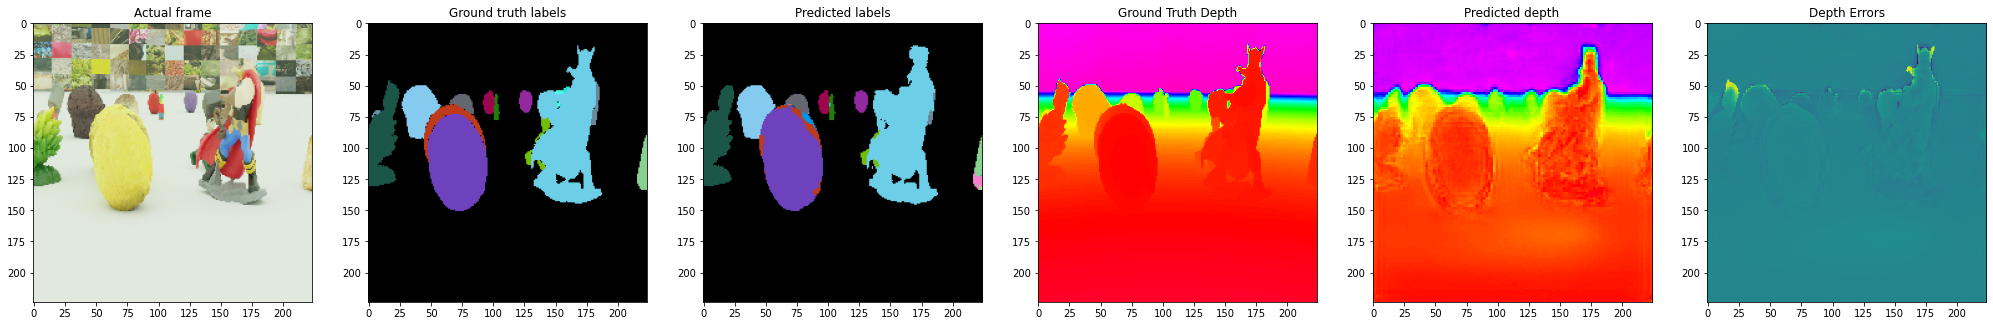

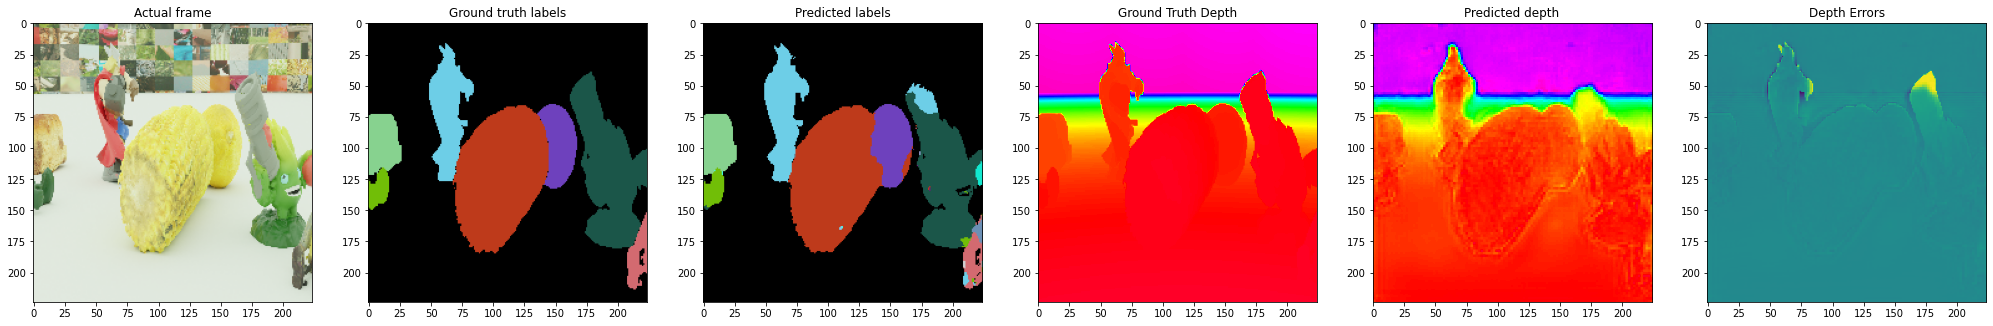

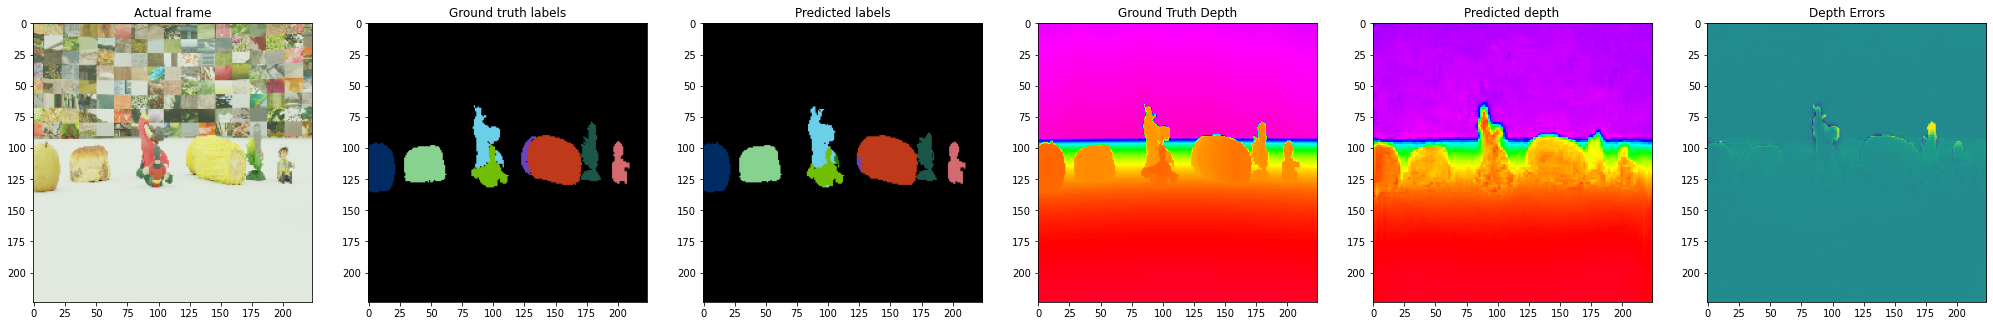

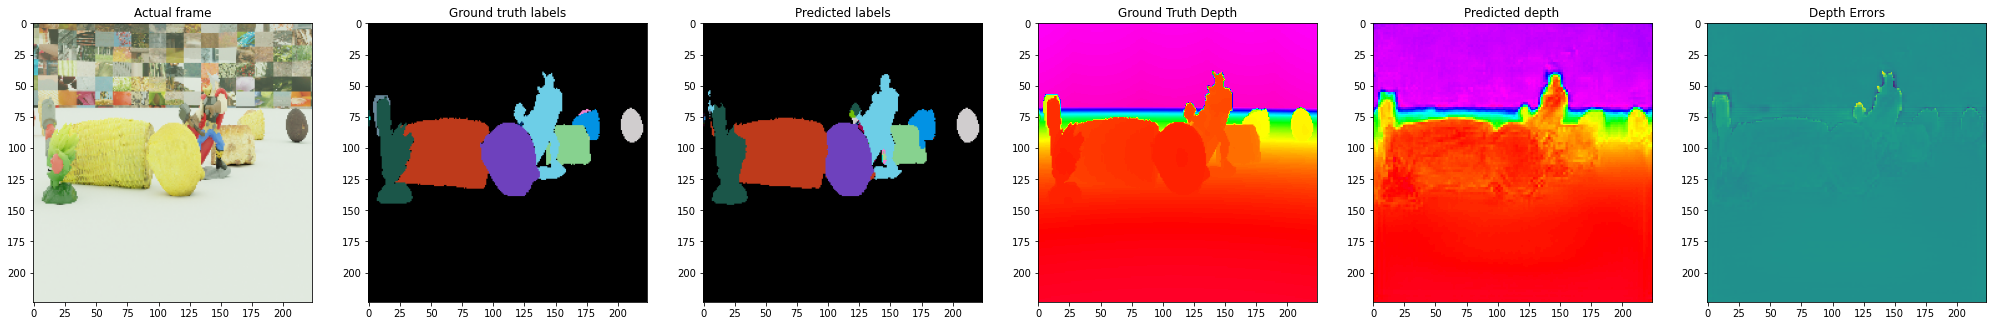

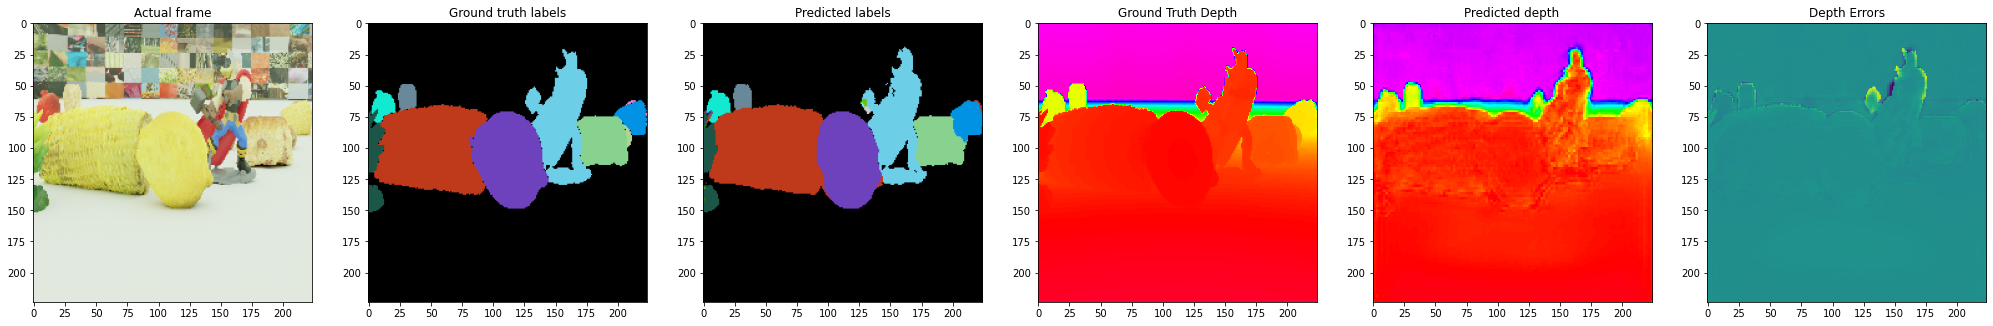

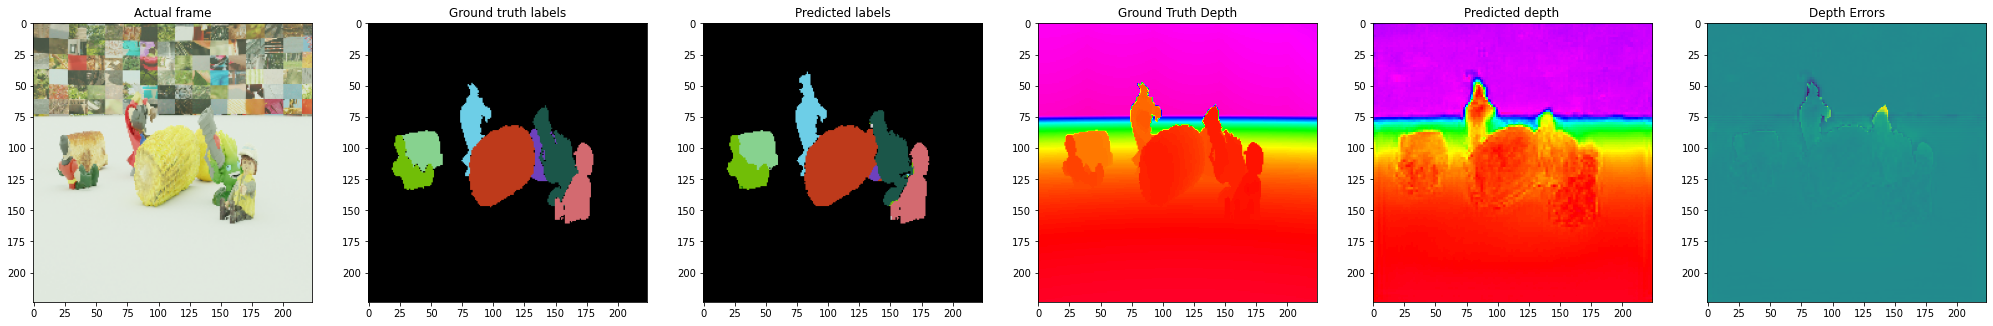

In [41]:
# Visualise predictions
if is_dir == True:
    depth_errors =[]
    colourmap = 'gist_rainbow'
    for i in range(0,len(left_imgs)):

        #print(batch_mask[i])
        fig = plt.figure(figsize=(35,12))

        ax1 = fig.add_subplot(1,6,1)
        ax1.imshow(left_imgs[i])
        ax1.title.set_text('Actual frame')
        ax1.grid(False)


        ax2 = fig.add_subplot(1,6,2)
        ax2.set_title('Ground truth labels')
        ax2.imshow(onehot_to_rgb(np.asarray((l_mask[i]))))
        ax2.grid(False)

        ax3 = fig.add_subplot(1,6,3)
        ax3.set_title('Predicted labels')
        ax3.imshow(onehot_to_rgb(pred_all[0][i]))
        ax3.grid(False)


        ax4 = fig.add_subplot(1,6,4)
        ax4.set_title('Ground Truth Depth')
        ax4.grid(False)
        ax4= plt.imshow(depth[i],cmap = colourmap)


        ax5 = fig.add_subplot(1,6,5)
        ax5.set_title('Predicted depth')
        ax5.grid(False)
        ax5 = plt.imshow(pred_all[2][i],cmap = colourmap)


        ax6 = fig.add_subplot(1,6,6)
        ax6.set_title('Depth Errors')
        ax6 = plt.imshow(pred_all[2][i] - depth[i])

        depth_errors.append(pred_all[2][i]-depth[i])


    #plt.saveplot('StereoSegResultsRight.png')

In [ ]:
# Visualise predictions
if is_pic == True:
    depth_errors =[]


    #print(batch_mask[i])
    fig = plt.figure(figsize=(35,12))

    ax1 = fig.add_subplot(1,5,1)
    ax1.imshow(left_img[0])
    ax1.title.set_text('Actual frame')
    ax1.grid(False)


    ax2 = fig.add_subplot(1,5,2)
    ax2.set_title('Ground truth labels')
    ax2.imshow(onehot_to_rgb(np.asarray((left_mask))))
    ax2.grid(False)

    ax3 = fig.add_subplot(1,5,3)
    ax3.set_title('Predicted labels')
    ax3.imshow(onehot_to_rgb(pred_all[0][0]))
    ax3.grid(False)


    ax4 = fig.add_subplot(1,5,4)
    ax4.set_title('Ground Truth Depth')
    ax4.grid(False)
    ax4= plt.imshow(depth_img)


    ax5 = fig.add_subplot(1,5,5)
    ax5.set_title('Predicted depth')
    ax5.grid(False)
    ax5 = plt.imshow(pred_all[2][0])


#     ax6 = fig.add_subplot(1,6,6)
#     ax6.set_title('Depth Errors')
#     ax6 = plt.imshow((pred_all[2][0] -depth_img))

    #depth_errors.append(pred_all[2][0]-depth_img)


#plt.saveplot('StereoSegResultsRight.png')

In [ ]:
# Function to check true hit/ false alarm rate
def objectCheck(ground_truth,prediction):
    true_coords = []
    false_coords = []
    pred = onehot_to_rgb(prediction)
    mask = onehot_to_rgb(ground_truth)
    
    
    true_bg_coords = []
    true_app_coords = []
    true_av_coords = []
    true_muff_coords = []
    true_lem_coords = []
    true_ging_coords = []
    true_gar_coords = []
    true_carr_coords = [] 
    true_ff_coords = []
    true_ralph_coords = []
    true_corn_coords = []
    true_cour_coords = []
    true_kiwi_coords = []
    true_par_coords = []
    true_play_coords = []
    true_plum_coords = []
    true_pom_coords = []
    true_rob_coords = []
    true_roll_coords = []
    true_sco_coords = []
    true_seed_coords = []
    true_sprout_coords = []
    true_thor_coords = []
    true_tomato_coords = []
    true_corn2_coords = []
    
    false_bg_coords = []
    false_app_coords = []
    false_av_coords = []
    false_muff_coords = []
    false_lem_coords = []
    false_ging_coords = []
    false_gar_coords = []
    false_carr_coords = [] 
    false_ff_coords = []
    false_ralph_coords = []
    false_corn_coords = []
    false_cour_coords = []
    false_kiwi_coords = []
    false_par_coords = []
    false_play_coords = []
    false_plum_coords = []
    false_pom_coords = []
    false_rob_coords = []
    false_roll_coords = []
    false_sco_coords = []
    false_seed_coords = []
    false_sprout_coords = []
    false_thor_coords = []
    false_tomato_coords = []
    false_corn2_coords = []
    
    
    
    true_bg_count= 0
    true_app_count = 0
    true_av_count = 0
    true_muff_count = 0
    true_lem_count = 0
    true_ging_count = 0
    true_gar_count = 0
    true_carr_count = 0 
    true_ff_count = 0
    true_ralph_count = 0
    true_corn_count = 0
    true_cour_count = 0
    true_kiwi_count = 0
    true_par_count = 0
    true_play_count = 0
    true_plum_count = 0
    true_pom_count = 0
    true_rob_count = 0
    true_roll_count = 0
    true_sco_count = 0
    true_seed_count = 0
    true_sprout_count = 0
    true_thor_count = 0
    true_tomato_count = 0
    true_corn2_count = 0
    
    false_bg_count = 0
    false_app_count = 0
    false_av_count = 0
    false_muff_count = 0
    false_lem_count = 0
    false_ging_count = 0
    false_gar_count = 0
    false_carr_count = 0 
    false_ff_count = 0
    false_ralph_count = 0
    false_corn_count = 0
    false_cour_count = 0
    false_kiwi_count = 0
    false_par_count = 0
    false_play_count = 0
    false_plum_count = 0
    false_pom_count = 0
    false_rob_count = 0
    false_roll_count = 0
    false_sco_count = 0
    false_seed_count = 0
    false_sprout_count = 0
    false_thor_count = 0
    false_tomato_count = 0
    false_corn2_count = 0
    
    total_bg_count = 0
    total_app_count = 0
    total_av_count = 0
    total_muff_count = 0
    total_lem_count = 0
    total_ging_count = 0
    total_gar_count = 0
    total_carr_count = 0 
    total_ff_count = 0
    total_ralph_count = 0
    total_corn_count = 0
    total_cour_count = 0
    total_kiwi_count = 0
    total_par_count = 0
    total_play_count = 0
    total_plum_count = 0
    total_pom_count = 0
    total_rob_count = 0
    total_roll_count = 0
    total_sco_count = 0
    total_seed_count = 0
    total_sprout_count = 0
    total_thor_count = 0
    total_tomato_count = 0
    total_corn2_count = 0
    
    
    true_coords_list = [true_bg_coords,true_app_coords,true_av_coords,true_muff_coords,true_lem_coords,true_ging_coords,
    true_gar_coords,true_carr_coords, true_ff_coords,true_ralph_coords,true_corn_coords,true_cour_coords,true_kiwi_coords,
    true_par_coords,true_play_coords,true_plum_coords,true_pom_coords,true_rob_coords,true_roll_coords,true_sco_coords,true_seed_coords,
    true_sprout_coords,true_thor_coords,true_tomato_coords,true_corn2_coords]
    
    false_coords_list = [false_bg_coords,false_app_coords,false_av_coords,false_muff_coords,false_lem_coords,false_ging_coords,
    false_gar_coords,false_carr_coords,  false_ff_coords, false_ralph_coords, false_corn_coords, false_cour_coords, false_kiwi_coords,
    false_par_coords,false_play_coords,false_plum_coords,false_pom_coords,false_rob_coords,false_roll_coords,false_sco_coords,
    false_seed_coords,false_sprout_coords,false_thor_coords,false_tomato_coords,false_corn2_coords]
    
    
    true_count_list = [true_bg_count,true_app_count,true_av_count,true_muff_count,true_lem_count,true_ging_count,true_gar_count,
    true_carr_count, true_ff_count,true_ralph_count,true_corn_count,true_cour_count,true_kiwi_count,true_par_count,true_play_count,
    true_plum_count,true_pom_count,true_rob_count,true_roll_count,true_sco_count,true_seed_count,true_sprout_count,true_thor_count,
    true_tomato_count,true_corn2_count]
    
    
    false_count_list =  [false_bg_count,false_app_count,false_av_count, false_muff_count,false_lem_count,false_ging_count,false_gar_count,
    false_carr_count, false_ff_count,false_ralph_count,false_corn_count,false_cour_count,false_kiwi_count,false_par_count,false_play_count,
    false_plum_count,false_pom_count,false_rob_count,false_roll_count,false_sco_count,false_seed_count,false_sprout_count,false_thor_count,
    false_tomato_count,false_corn2_count]
    
    total_count_list =  [total_bg_count,total_app_count,total_av_count,total_muff_count,total_lem_count,total_ging_count,
    total_gar_count,total_carr_count,total_ff_count,total_ralph_count,total_corn_count,total_cour_count,total_kiwi_count,
    total_par_count,total_play_count,total_plum_count,total_pom_count,total_rob_count,total_roll_count,total_sco_count,
    total_seed_count,total_sprout_count,total_thor_count,total_tomato_count,total_corn2_count]
    
    
    iterate = 0
    for j in range(0,len(id2code)):
        print('iteration:' + str(iterate))
        idx = id2code[j]
        print(j)
        gt_coords = np.where(mask[:,:,1] == idx[1])
        pred_coords = np.where(pred[:,:,1] == idx[1])
        pred_coords = tuple(zip(pred_coords[0],pred_coords[1]))
        gt_coords = tuple(zip(gt_coords[0],gt_coords[1]))
        total_count_list[j] = len(gt_coords)
#         gt_coords_list.append(gt_coords)
#         pred_coords_list.append(pred_coords)
        for i in pred_coords:
            #print('coords:',i )
            if i in gt_coords:
                #print('true coords:', i)
                true_coords_list[j].append(i)
                true_count_list[j] += 1
                #print('pixel for class ',str(id2name[j]),' true coords found')
            if i not in gt_coords:
                #print('not in pred:',i)
                #false_coords.append(i)
                #false_count += 1
                false_coords_list[j].append(i)
                false_count_list[j] += 1
                #print('pixel for class ',str(id2name[j]),' false coords found')
        iterate +=1
            #true_count_list[j].append(true_coords)
            

    return true_coords_list,false_coords_list,true_count_list,false_count_list,total_count_list
    
    

In [ ]:
object_statistics = []


In [ ]:
# loops over left seg predicitons and left mask to determine where correct and false predictions are made
for i in range(0,batch_size):
    pred = pred_all[0][i]
    masking = l_mask[i]
    stats = objectCheck(masking,pred)
    object_statistics.append(stats)

In [ ]:
# Sorts results for printing to csv
true_counts = []
false_counts = []
total_counts = []
for i in range(len(object_statistics)):
    true_count = object_statistics[i][2]
    false_count = object_statistics[i][3]
    total_count = object_statistics[i][4]
    true_counts.append(true_count)
    false_counts.append(false_count)
    total_counts.append(total_count)

In [ ]:
# csv row titles
rows = ['TrueBG','TrueApp','TrueAvoc','TrueMuff','TrueLem','TrueGing','TrueGar','TrueCarr','TrueFF','TrueRalph','TrueCorn',
        'TrueCourg','TrueKiwi','TruePars','TruePlay','TruePlum','TruePom','TrueRobin','TrueRoll','TrueSco','TrueSeed','TrueSprout',
       'TrueThor','TrueTom','TrueCorn2','FalseBG','FalseApp','FalseAvoc','FalseMuff','FalseLem','FalseGing','FalseGar','FalseCarr','FalseFF','FalseRalph','FalseCorn',
        'FalseCourg','FalseKiwi','FalsePars','FalsePlay','FalsePlum','FalsePom','FalseRobin','FalseRoll','FalseSco','FalseSeed','FalseSprout',
       'FalseThor','FalseTom','FalseCorn2','TotalBG','TotalApp','TotalAvoc','TotalMuff','TotalLem','TotalGing','TotalGar','TotalCarr','TotalFF','TotalRalph','TotalCorn',
        'TotalCourg','TotalKiwi','TotalPars','TotalPlay','TotalPlum','TotalPom','TotalRobin','TotalRoll','TotalSco','TotalSeed','TotalSprout',
       'TotalThor','TotalTom','TotalCorn2']

In [ ]:
# write results to lists
csv_results = [] # Working results writer
for i in range(batch_size):
    true = true_counts[i]
    false = false_counts[i]
    total = total_counts[i]
    csv_results.append(true + false + total)

In [ ]:
# create and save csv of true hit/ false alarm rates

import csv

with open("Stats.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(csv_results)